## What is a time series problem?

Time series problems deal with data over time.

Such as, temperature forecasting, the electricity usage for the past 50-years, future price of gold or bitcoin, ...

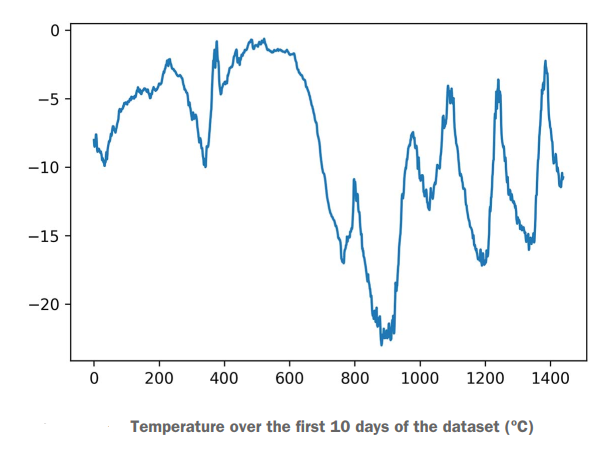

In time series problems, you'll either have univariate or multivariate data.


*   **Univariate** time series data deals with one variable, for example, using the price of Bitcoin to predict the price of Bitcoin.
*   **Multivariate** time series data deals with more than one variable, for example, predicting electricity demand using the day of week, time of year and number of houses in a region.



## Forecasting Covid-19 cases

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,203942,204094,204287,204392,204417,204510,204610,204724,204820,204982
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333071,333088,333103,333125,333138,333156,333161,333197,333215,333233
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,270891,270906,270917,270924,270929,270939,270952,270969,270981,270996
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46588,46664,46664,46664,46664,46664,46664,46664,46824,46824
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333685,333685,333685,333685,333685,333685,333685,333685,333685,333685


In [ ]:
country = "Iran"
df_Iran = df[df["Country/Region"] == country]
df_Iran = pd.DataFrame(df_Iran[df_Iran.columns[4:]].sum(), columns=["confirmed"])
df_Iran.index = pd.to_datetime(df_Iran.index,format='%m/%d/%y')

df_Iran

,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2022-11-13,7558950
2022-11-14,7559001
2022-11-15,7559055
2022-11-16,7559055


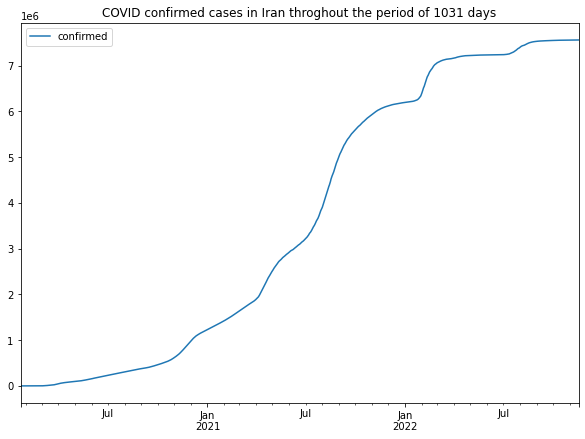

In [ ]:
df_Iran.plot(figsize=(10,7),title=f"COVID confirmed cases in Iran throghout the period of {len(df_Iran)} days")

In [ ]:
timesteps = df_Iran.index.to_numpy()
cases = df_Iran["confirmed"].to_numpy()

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.7 * len(cases)) 
size = int(0.15 * len(cases))
# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], cases[:split_size]

# Create test data splits (everything after the split)
X_val, y_val = timesteps[split_size:split_size+size], cases[split_size:split_size+size]

X_test, y_test = timesteps[split_size+size:], cases[split_size+size:]


len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test)

(721, 154, 156, 721, 154, 156)

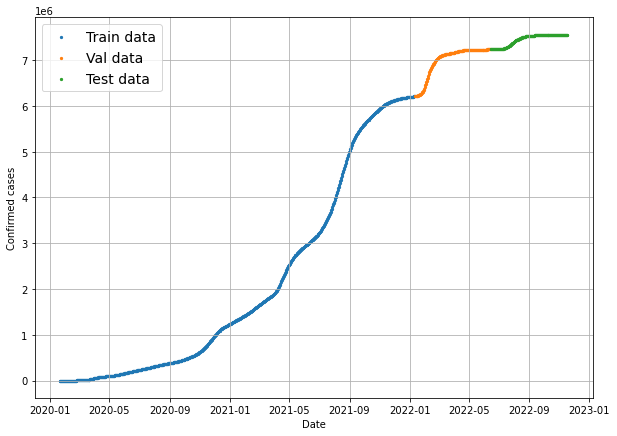

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_val, y_val, s=5, label="Val data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_Iran) 
cases_scaled = scaler.transform(df_Iran)
cases_scaled = cases_scaled.reshape(1031,)

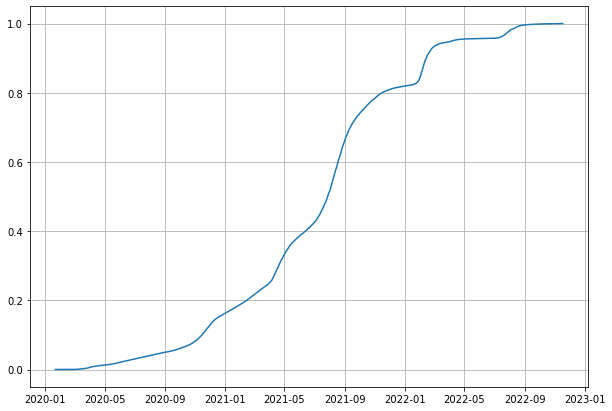

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, cases_scaled)
plt.grid(True)
plt.show()

## Windowing dataset

Windowing is a method to turn a time series dataset into **supervised learning problem**. In other words, we want to use windows of the past to predict the future.
For example, consider a simple univariate time series with data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] , `window size=7` to predict the next single value (`horizon=1`) :

[0, 1, 2, 3, 4, 5, 6] -->  [7]

[1, 2, 3, 4, 5, 6, 7] -->  [8]

[2, 3, 4, 5, 6, 7, 8] -->  [9]

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use seven data of before timesteps to predict

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
A = np.array([1, 2, 3, 4, 5, 6])
A.shape

(6,)

In [ ]:
A_1 = np.expand_dims(A, axis=0)
print(A_1)
print(A_1.shape)

[[1 2 3 4 5 6]]
(1, 6)


In [ ]:
test_window, test_label = get_labelled_windows(A_1, horizon=1)
print(f"Window: {np.squeeze(test_window)} -> Label: {np.squeeze(test_label)}")

Window: [1 2 3 4 5] -> Label: 6




1.   Creates a window step of specific window size, for example: `[[0, 1, 2, 3, 4, 5, 6, 7]]`
2.   Uses NumPy indexing to create a 2D of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6, 7],
[1, 2, 3, 4, 5, 6, 7, 8],
[2, 3, 4, 5, 6, 7, 8, 9]]
```
1.   Uses the 2D array of multuple window steps to index on a target series
2.   Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified step








In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(cases_scaled, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1024, 1024)

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.3):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  val_windows = windows[split_size:split_size+int(len(windows)*0.15)]
  val_labels = labels[split_size:split_size+int(len(windows)*0.15)]
  test_windows = windows[split_size+int(len(windows)*0.15):]
  test_labels = labels[split_size+int(len(windows)*0.15):]
  return train_windows, val_windows, test_windows, train_labels, val_labels, test_labels

In [ ]:
train_windows, val_windows, test_windows, train_labels, val_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(val_windows), len(test_windows), len(train_labels), len(val_labels), len(test_labels)

(716, 153, 155, 716, 153, 155)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
#build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM

x = layers.LSTM(128, activation="relu", return_sequences=True)(x) 
x = layers.LSTM(64, activation="relu")(x) 
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model = tf.keras.Model(inputs=inputs, outputs=output)


In [ ]:
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


history = model.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=16,
            validation_data=(val_windows, val_labels))

Epoch 1/100
45/45 [==============================] - 4s 17ms/step - loss: 0.1951 - val_loss: 0.0705
Epoch 2/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0379 - val_loss: 0.1059
Epoch 3/100
45/45 [==============================] - 0s 7ms/step - loss: 0.0131 - val_loss: 0.0292
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0149
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0056
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0069
Epoch 7/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0152
Epoch 8/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0161
Epoch 9/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0222
Epoch 10/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0032 - val_loss: 0.0088
Epoch 1

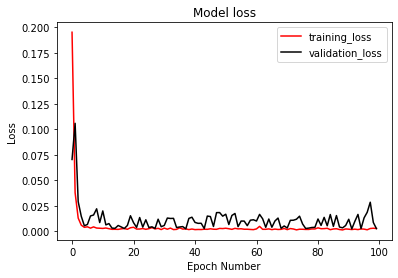

In [ ]:
import matplotlib.pyplot as plt
plt.title('Model loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'],'r',label = 'training_loss')
plt.plot(history.history['val_loss'],'k', label = 'validation_loss')
plt.legend()

In [ ]:
model.evaluate(test_windows, test_labels, verbose=2)

5/5 - 0s - loss: 8.9980e-04 - 29ms/epoch - 6ms/step


0.0008998028934001923

In [ ]:
pred = model.predict(test_windows)

5/5 [==============================] - 0s 4ms/step


In [ ]:
pred_value = scaler.inverse_transform(pred)

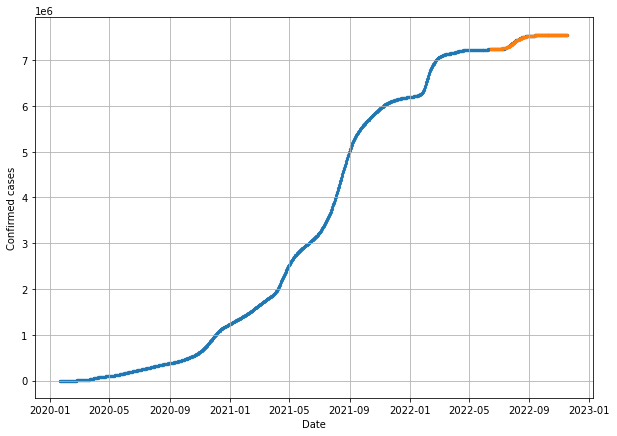

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(timesteps, cases, s=5)
plt.scatter(X_test[:155], pred_value, s=5)
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.grid(True)
plt.show()